# Comparing Drum Rhythms as Vectors

Lately I've been toying around with the idea of comparing drum styles mathematically. For example, I've been considering whether we can mathematically calculate how Ringo Starr's drumming with the Beatles changed over the course of the 1960's. How does my own drumming style compare to those of my influences? How does my style change between different projects I play in?

Of course, I can qualitatively answer these questions, but it would be much more fun to throw some quantitative element into the mix.

**This is a first step in doing so.**

As a drummer, I typically learn challenging rhythms by inputting the them into a drum machine and then playing them back, allowing me to both see and hear the rhythm and then translate that into physical movements with my hands and feet. The interface for my drum machine is a grid, with each column serving as a subdivision of time and each row serving as a different sound (kick, snare, hihat, cymbal, etc.). Like so...

![Drum Machine](http://www.apfelmagazine.de/wp-content/uploads/dm1-the-drum-machine-3.jpg)

I realized that this grid, in its simplest form, looks very much like a matrix with 1's where a sound is activated (drum is hit) or 0 where there is a rest (or no action). Once these patterns are in matrix form, we can measure similarity between patterns by calculating the distances between them.

## Goal of this workbook

This workbook is an initial attempt to test the approach of calculating the similarity between drum patterns mathematically, using simple one-instrument patterns as a test case.

To test out this approach, I found a series of Afro-Cuban bell patterns on a Wikipedia page (https://en.wikipedia.org/wiki/Bell_pattern). I selected these patterns because I knew from experience that these patterns are related in some way. For example, as we'll see below, the clave pattern can be found in Cuban, African, and Brazilian drumming, though the pattern name may change from region to region. I also selected these patterns because they were all in the same time signature and on the same Wikipedia page, making the data collection effort *wayyyyy* easier :).

I translated the bell patterns into one-dimensional matrices (i.e. vectors), and then calculated the Euclidean distance between each vector to compare their similarity.

**Euclidean Distance Formula:**
![Euclidean Distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0ef4fe055b2a51b4cca43a05e5d1cd93f758dcc)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 4/4 Sub-Saharan African Bell Patterns

Pattern 1 (4/4 standard pattern) is played on the head of a small Yoruba bata drum in Benin. Pattern 2 is used by the Yoruba and Igbo people of Nigeria. Pattern 3 is the bell part in _fufume_ (Ghana). Pattern 4 is used by the Ga people (Ghana) for the rhythm _gahu_. Patterns 3 and 5 are used in the Ghanaian rhythm _kpanlogo_. Patterns 2 and 3 are known in Cuba as rumba clave and son clave respectively.

![African Bell Patterns](https://upload.wikimedia.org/wikipedia/en/thumb/6/69/African_bell-2.png/600px-African_bell-2.png)

In [3]:
# Create dictionary of rhythms
SSA = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'SSA_1':[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
        'SSA_2':[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        'SSA_3':[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        'SSA_4':[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        'SSA_5':[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]}

In [4]:
# Transform dictionary into dataframe
SSA_df = pd.DataFrame(SSA, index=SSA['Time']).ix[:,:5].T
SSA_df

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
SSA_1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1
SSA_2,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
SSA_3,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
SSA_4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
SSA_5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


## We can visualize these rhythms using a heatmap

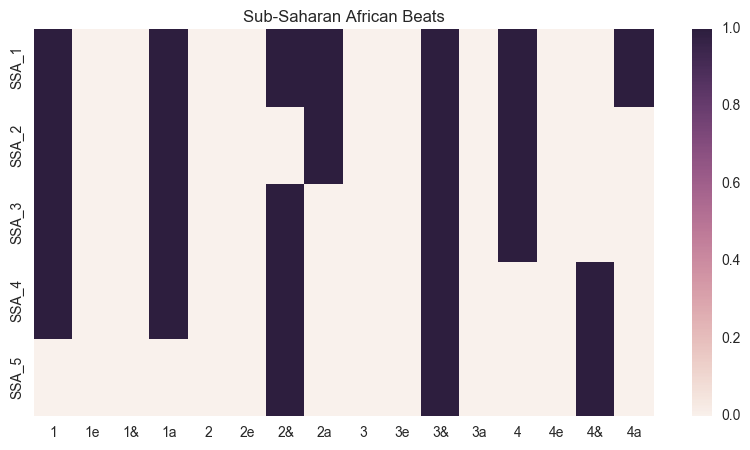

In [5]:
# Visualize rhythms
plt.figure(figsize=(10,5))
plt.title('Sub-Saharan African Beats')
sns.heatmap(SSA_df)

# 4/4 Cuban Bell Patterns

Pattern 1 is _son clave_, usually played on wooden claves. Pattern 2 is the _baqueteo_, the key pattern used in _danzón_ and the first expression of clave in written music. The baqueteo consists of the son clave strokes, plus four additional strokes. Not technically a bell pattern, the baqueteo is played on the güiro and on the heads of the timbales. This pattern is actually split between two percussive tones: muted and open.

In the 1940s the cowbell was added to the timbales in the first _danzón-mambos_ of the charanga orchestras. Later, multiple cowbells, a cymbal and the occasional woodblock were added to the timbale setup. Patterns 3 and 4 are _guaguancó cáscara_ patterns adopted as mambo bell parts. During the mambo era of the 1940s, bongo players began regularly using a large hand-held cowbell during the montuno section in son groups. This bongo bell role was introduced in the _son conjunto_ of Arsenio Rodríguez. Pattern 5 is the basic bongo bell pattern.

![Cuban Bell Patterns](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Cuban_bells-2.tif/lossy-page1-600px-Cuban_bells-2.tif.jpg)

In [6]:
Cuban = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Cuban_1':[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        'Cuban_2':[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        'Cuban_3':[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
        'Cuban_4':[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
        'Cuban_5':[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]}

In [7]:
Cuban_df = pd.DataFrame(Cuban, index=Cuban['Time']).ix[:,:5].T
Cuban_df

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
Cuban_1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
Cuban_2,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0
Cuban_3,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0
Cuban_4,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1
Cuban_5,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1


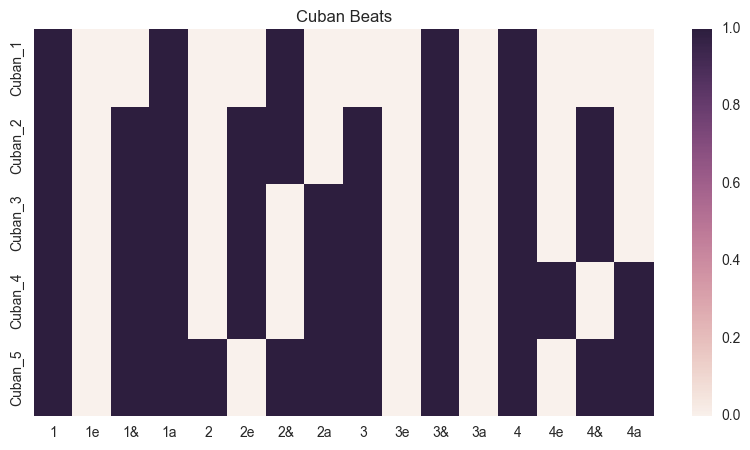

In [8]:
plt.figure(figsize=(10,5))
plt.title('Cuban Beats')
sns.heatmap(Cuban_df)

# 4/4 Afro-Brazilian Patterns

Bell pattern 1 is used in _maculelê_ and some _Candomblé_ and _Macumba_ rhythms. Pattern 1 is known in Cuba as _son clave_. Bell 2 is used in _afoxê_ and can be thought of as pattern 1 embellished with four additional strokes. Bell 3 is used in _batucada_. Pattern 4 is the _maracatu_ bell and can be thought of as pattern 1 embellished with four additional strokes.

![Afro-Brazilian Bell Patterns](https://upload.wikimedia.org/wikipedia/en/e/e1/Brazilian_bells.png)

In [9]:
AfroBraz = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'AB_1':[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        'AB_2':[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        'AB_3':[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
        'AB_4':[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]}

In [10]:
AB_df = pd.DataFrame(AfroBraz, index=AfroBraz['Time']).ix[:,:4].T
AB_df

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
AB_1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
AB_2,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
AB_3,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1
AB_4,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


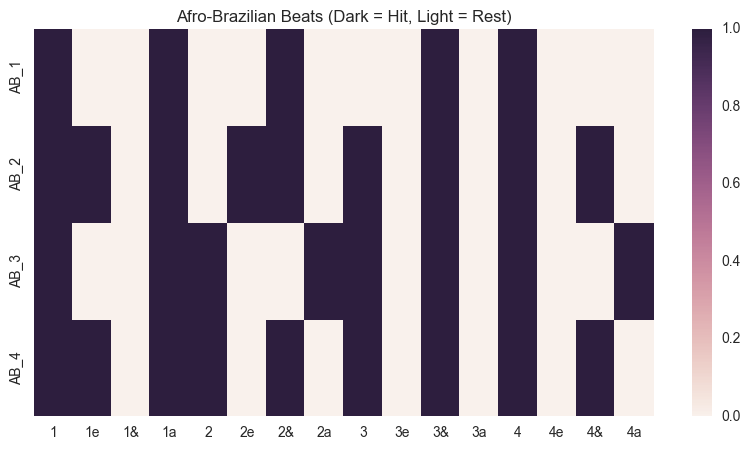

In [26]:
# Visualize patterns
plt.figure(figsize=(10,5))
plt.title('Afro-Brazilian Beats (Dark = Hit, Light = Rest)')
sns.heatmap(AB_df)



### We'll now combine the three dataframe's into one and calculate each row's similarity (i.e. distance) to others in the dataframe.

In [12]:
# Combine all three tables into one
rhythms = pd.concat([SSA_df,Cuban_df,AB_df], axis=0)

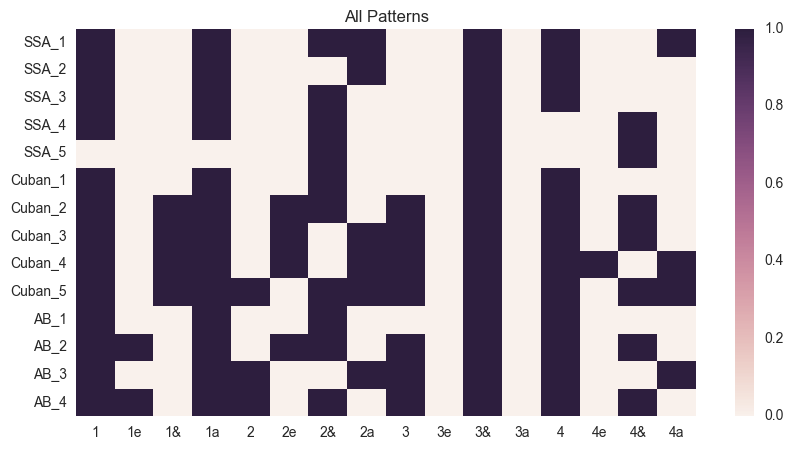

In [13]:
plt.figure(figsize=(10,5))
plt.title('All Patterns')
sns.heatmap(rhythms)

In [14]:
# Create Euclidean distance dictionary, skipping comparing distance of the pattern to itself
dist0 = {}
for i in range(len(rhythms.index)):
    temp_dist = {}
    for j in range(len(rhythms.index)):
        if i == j:
            pass
        else:
            temp_dist['{}'.format(rhythms.index[j])] = distance.euclidean(rhythms.ix[i,:],rhythms.ix[j,:])
    dist0['{}'.format(rhythms.index[i])] = temp_dist

In [15]:
# Create dataframe of Euclidean distances
distances = pd.DataFrame(dist0)
distances

,AB_1,AB_2,AB_3,AB_4,Cuban_1,Cuban_2,Cuban_3,Cuban_4,Cuban_5,SSA_1,SSA_2,SSA_3,SSA_4,SSA_5
AB_1,NaN,2.000000,2.236068,2.000000,0.000000,2.000000,2.449490,2.645751,2.449490,1.414214,1.414214,0.000000,1.414214,2.000000
AB_2,2.000000,NaN,2.645751,1.414214,2.000000,1.414214,2.000000,2.645751,2.449490,2.449490,2.449490,2.000000,2.000000,2.449490
AB_3,2.236068,2.645751,NaN,2.236068,2.236068,2.645751,2.236068,2.000000,1.732051,1.732051,1.732051,2.236068,2.645751,3.000000
AB_4,2.000000,1.414214,2.236068,NaN,2.000000,2.000000,2.449490,3.000000,2.000000,2.449490,2.449490,2.000000,2.000000,2.449490
Cuban_1,0.000000,2.000000,2.236068,2.000000,NaN,2.000000,2.449490,2.645751,2.449490,1.414214,1.414214,0.000000,1.414214,2.000000
Cuban_2,2.000000,1.414214,2.645751,2.000000,2.000000,NaN,1.414214,2.236068,2.000000,2.449490,2.449490,2.000000,2.000000,2.449490
Cuban_3,2.449490,2.000000,2.236068,2.449490,2.449490,1.414214,NaN,1.732051,2.000000,2.449490,2.000000,2.449490,2.449490,2.828427
Cuban_4,2.645751,2.645751,2.000000,3.000000,2.645751,2.236068,1.732051,NaN,2.236068,2.236068,2.236068,2.645751,3.000000,3.316625
Cuban_5,2.449490,2.449490,1.732051,2.000000,2.449490,2.000000,2.000000,2.236068,NaN,2.000000,2.449490,2.449490,2.449490,2.828427
SSA_1,1.414214,2.449490,1.732051,2.449490,1.414214,2.449490,2.449490,2.236068,2.000000,NaN,1.414214,1.414214,2.000000,2.449490


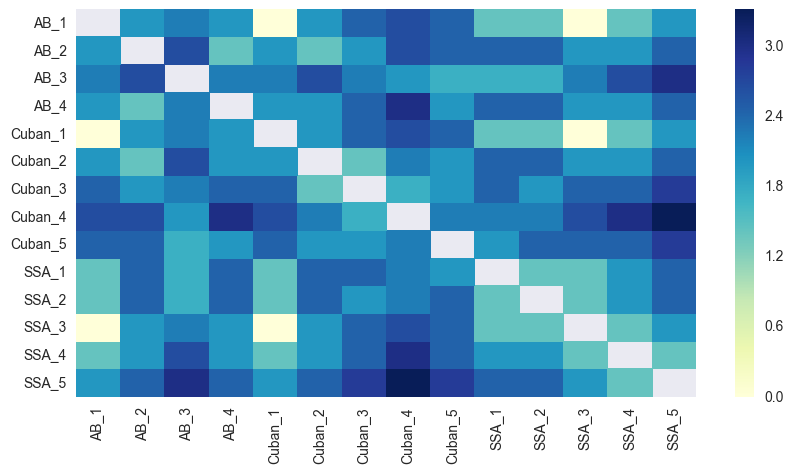

In [16]:
# Plot heatmap of distances between vectors (rhythms)
plt.figure(figsize=(10,5))
plt.ylabel
sns.heatmap(distances, cmap='YlGnBu')

# Quick break for some findings

From looking at the heatmap, and distance scores, we gain a few immediate insights:

- Cuban beat 1, Sub-Saharan African beat 3, and Afro-Brazilian beat 1 are all the same. This is the clave rhythm, which is prominent in most musical styles (clearly). Of course, this isn't a groundbreaking finding. We could have just looked closely at the rhythm notation or the rhythm heatmap. That said, the clave is relatively closely related to all Sub-Saharan African rhythms, as most seem to be variations of this rhythm.
- Sub-Saharan African rhythms generally are more closely related to each other than Cuban or Afro-Brazilian rhythms. This is likely due to the relative sparsity of SSA bell rhythms compared to the others (fewer notes, fewer deviations in placement of notes).
- On a related note, busier patterns generally are at a greater distance from other rhythms, representing less of a similarity. That said, I'm skeptical of this finding for a couple reasons. 1) I flattened some multi-tonal/instrumental rhythms into one dimension without assigning any distinction between the different tones. This could be misleading, considering that the "core notes" of the rhythm - that is, notes in the rhythm that provide its main structure - may be underweighted in this method.


## Couple more things...

Below, I've added up each column for each family of rhythms and taken the average to see the relative frequency of hits at each subdivision of time.

In [20]:
AB_sum = pd.DataFrame(np.sum(AB_df)/len(AB_df))
SSA_sum = pd.DataFrame(np.sum(SSA_df)/len(SSA_df))
Cuban_sum = pd.DataFrame(np.sum(Cuban_df)/len(Cuban_df))
rhythm_totals = pd.concat([AB_sum, SSA_sum, Cuban_sum],axis=1,).T

In [33]:
rhythm_totals.index = ['Afro-Brazilian','Sub-Saharan African','Cuban']
rhythm_totals

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
Afro-Brazilian,1.0,0.5,0.0,1.0,0.5,0.25,0.75,0.25,0.75,0.0,1.0,0.0,1.0,0.0,0.5,0.25
Sub-Saharan African,0.8,0.0,0.0,0.8,0.0,0.00,0.80,0.40,0.00,0.0,1.0,0.0,0.6,0.0,0.4,0.20
Cuban,1.0,0.0,0.8,1.0,0.2,0.60,0.60,0.60,0.80,0.0,1.0,0.0,1.0,0.2,0.6,0.40


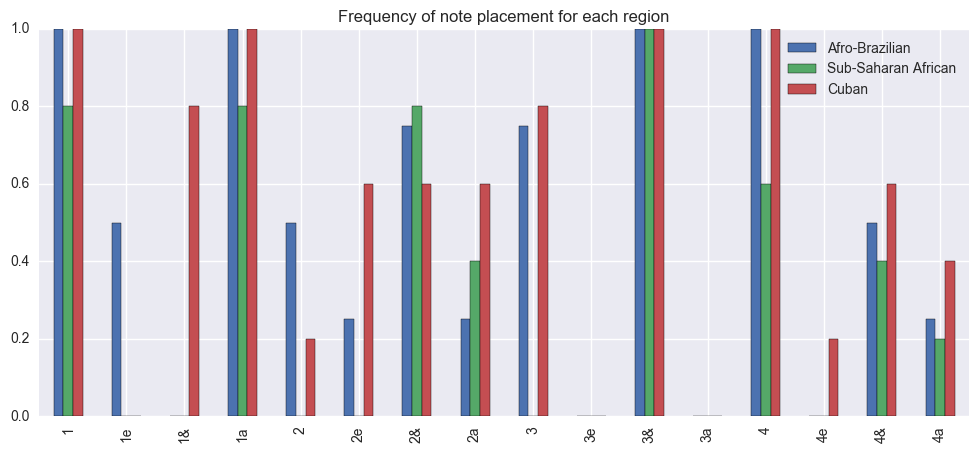

In [37]:
rhythm_totals.T.plot.bar(figsize=(12,5), title = 'Frequency of note placement for each region')

The above graph shows that all rhythms are pretty consistently falling on 1, 1-a, 2-&, 3-&, and 4, which make up the clave beat. Afro-Brazilian and Cuban rhythms are also falling frequently on 3, but Sub-Saharahan African rhythms clearly is showing no love for 3. Moving forward, I'm curious about using "distance-from-clave" as a metric for these rhythms.

## Overall similarity

Quickly comparing the overall distances between families of rhythms using the rhythm_totals dataframe used in the above graph, we see that Cuban and Afro-Brazilian rhythms have a greater similarity to each other than Sub-Saharan African rhythms. As stated before, this is likely because Afro-Brazilian and Cuban rhythms are much "notier" than SSA rhythms.

In [23]:
dist2 = {}

for i in range(len(rhythm_totals.index)):
    temp2 = []
    for j in range(len(rhythm_totals.index)):
        temp2.append(distance.euclidean(rhythm_totals.ix[i,:],rhythm_totals.ix[j,:]))
    dist2['{}'.format(rhythm_totals.index[i])] = temp2
dist2

{'AB': [0.0, 1.1842719282327012, 1.15],
 'C': [1.15, 1.4560219778561037, 0.0],
 'SSA': [1.1842719282327012, 0.0, 1.4560219778561037]}

In [24]:
tot_distances = pd.DataFrame(dist2)
cols = [i for i in rhythm_totals.index]
tot_distances = tot_distances[cols]
tot_distances.index = cols
tot_distances

,AB,SSA,C
AB,0.000000,1.184272,1.150000
SSA,1.184272,0.000000,1.456022
C,1.150000,1.456022,0.000000


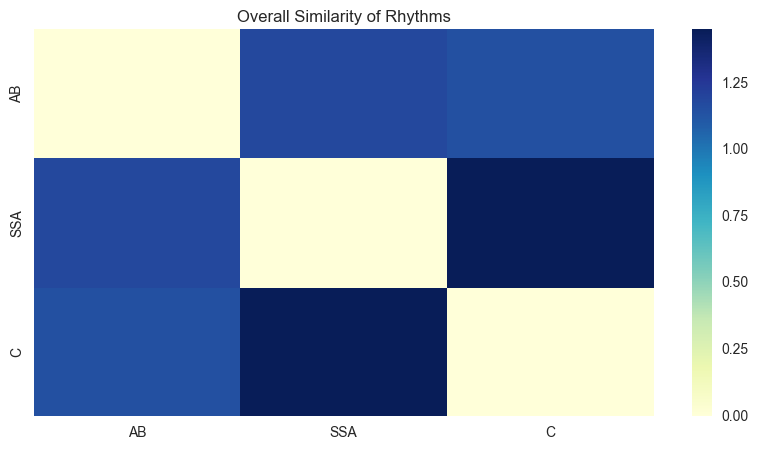

In [39]:
# Plot heatmap of distances between vectors (i.e. schemas)
plt.figure(figsize=(10,5))
plt.title('Overall Similarity of Rhythms')
sns.heatmap(tot_distances, cmap='YlGnBu')

# Moving Forward

There are a few directions I'd like to take this.

- First, considering that we now have distances between each rhythm, I'd like to see how Dijkstra's algorithm could apply to this exercise. Since the algorithm finds the shortest distances between nodes in a graph, this could provide a path of greatest similarity among rhthms. It would be interesting to compare this path with historical/cultural relationships between rhythms and see if any similarities arise.
- Secondly, I'm not convinced the approach of flattening and assigning absolute [0,1] values for rests/hits makes the most sense, as it removes a lot of the nuance of the rhythms. As seen in the Afro-Brazilian and Cuban rhythms, muted notes and different tones appear and aren't really captured in my approach besides the fact that they're happening. Figuring this element out would also allow me to start looking at multi-instrumental percussion rhythms - such as drumset patterns.
- Third, these may not even be the best rhythms to be comparing with each other! I love you, Wikipedia, but there may be more appropriate rhythms, or additional ones, out there to be used in this dataset. It may be time to snoop around some additional sources.